In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
x = pd.read_csv("./data/weightedX.csv")
y = pd.read_csv("./data/weightedY.csv")
x = x.values
y = y.values
a = x
b = y
print(x.shape, y.shape)

x = (x-x.mean())/x.std()

(99, 1) (99, 1)


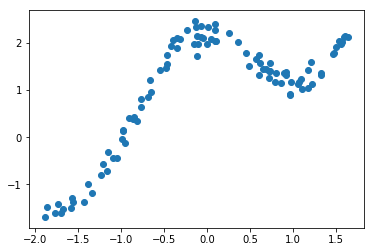

In [77]:
# the given data set doesn't follow linear relationship between x and y

plt.scatter(x,y)
plt.show()

## Underfitting

[[0.84167029]]
[1.02986178]


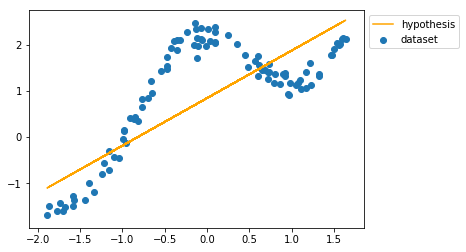

In [78]:
# or hypothesis model is way too simple for the given dataset

def hypothesis(theta, x):
    y = theta[0] + theta[1]*x
    return y

from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(x,y)
print(lr.coef_)
print(lr.intercept_)

theta = np.array([lr.coef_, lr.intercept_])
y_predicted = hypothesis(theta, x)
plt.plot(x, y_predicted, color = "orange", label = "hypothesis")
plt.scatter(x,y, label = "dataset")
plt.legend(loc = "upper left", bbox_to_anchor = (1,1))
plt.show()


In [79]:
# Increasing the complexity of our model by adding a feature, thus making it a quadratic(parabola) which will give us a boundary

# reshaped both x and y to linear array and then stcked both x1 and x2
x = x.reshape((99,))
y = y.reshape((99,))

# added another feature 
x1 = x
x2 = x**2

X = np.stack((x1, x2), axis = 1) # axis specifies the indexing of the upcoming array in the new array
print(x.shape, y.shape)
print(X.shape)


(99,) (99,)
(99, 2)


[ 0.7605872  -0.68708745]
1.7169492241159656


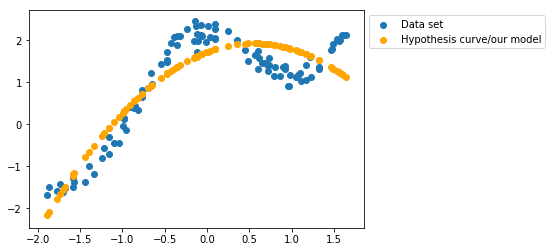

In [87]:
from sklearn.linear_model import LinearRegression

# defined hypothesis in form of a quadractic to form a curve
def hypothesis(theta, x):
    y = theta[0] + theta[1]*x + (theta[2]*(x**2))
    return y

lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

theta = np.array([lr.intercept_, lr.coef_[0], lr.coef_[1]])

y_predicted = hypothesis(theta, X)
plt.scatter(x,y, label = "Data set")
plt.scatter(X[:,0], y_predicted[:,0], color = "orange", label = "Hypothesis curve/our model")
plt.legend(loc = "upper left", bbox_to_anchor = (1,1))
plt.show()

# our model which is a liner one still it is able to generate fairly complex boundary
